In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##melt --- reshaping function

In [2]:
from tensorflow.keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,MaxPooling2D,BatchNormalization

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import ModelCheckpoint              # Start where model is ending 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

from keras.preprocessing import image

In [4]:
train_dir=r"C:\Users\ASUS\Desktop\Deep Learning\CNN Projects\Shoe vs Sandal vs Boot Dataset"
test_dir=r"C:\Users\ASUS\Desktop\Deep Learning\CNN Projects\Shoe vs Sandal vs Boot Dataset"


In [5]:
train_dir

'C:\\Users\\ASUS\\Desktop\\Deep Learning\\CNN Projects\\Shoe vs Sandal vs Boot Dataset'

In [6]:
test_dir

'C:\\Users\\ASUS\\Desktop\\Deep Learning\\CNN Projects\\Shoe vs Sandal vs Boot Dataset'

# image preprocessing with image data generator 

In [7]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Set The directory

In [8]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    
    target_size=(48, 48), 
    batch_size=64, 
    color_mode="grayscale", 
    class_mode='categorical',
    subset="training"
)
validation_generator = validation_datagen.flow_from_directory( 
        directory=test_dir,
        target_size=(48, 48), 
        batch_size=64, 
        color_mode="grayscale", 
        class_mode='categorical',
        subset="validation") 


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


# Visualization 

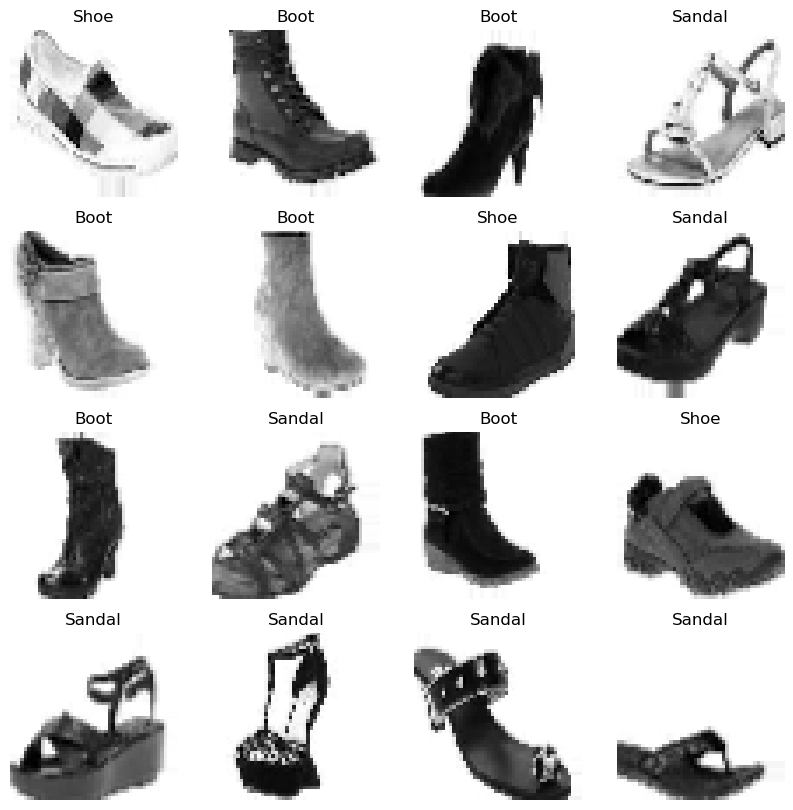

In [9]:
import matplotlib.pyplot as plt

batch =next(train_generator)

fig,axes =plt.subplots(nrows=4,ncols=4,figsize=(10,10))
for i , ax in enumerate(axes.flat):
    ax.imshow(batch[0][i],cmap='gray')
    label_idx=batch[1][i].argmax()
    label_map={v:k for k,v in train_generator.class_indices.items()}
    ax.set_title(label_map[label_idx])
    ax.axis('off')
    
plt.show()

# CNN Model

In [12]:
model= Sequential()
# write number of neurons - in the power of 2
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))

model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       1,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001,923 (7.64 MB)

 Trainable params: 2,001,731 (7.64 MB)

 Non-trainable params: 192 (768.00 B)

In [13]:
checkpoint_callback=ModelCheckpoint(
filepath = "model.weights.h5",
monitor='val_accuracy',
save_best_only=True,
save_weights_only=True,
mode="max",
verbose=1
)

history=model.fit(
train_generator,
batch_size=64,
epochs=10,
validation_data=validation_generator,
callbacks=[checkpoint_callback]
)

Epoch 1/10


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.6492 - loss: 1.2561
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to model.weights.h5
188/188 ━━━━━━━━━━━━━━━━━━━━ 116s 567ms/step - accuracy: 0.6496 - loss: 1.2533 - val_accuracy: 0.3333 - val_loss: 30.7216
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.8191 - loss: 0.4501
Epoch 2: val_accuracy improved from 0.33333 to 0.33867, saving model to model.weights.h5
188/188 ━━━━━━━━━━━━━━━━━━━━ 105s 552ms/step - accuracy: 0.8192 - loss: 0.4499 - val_accuracy: 0.3387 - val_loss: 23.8417
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.8754 - loss: 0.3283
Epoch 3: val_accuracy improved from 0.33867 to 0.90467, saving model to model.weights.h5
188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 559ms/step - accuracy: 0.8755 - loss: 0.3282 - val_accuracy: 0.9047 - val_loss: 0.3042
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.8974 - loss: 0.2869
Epoch 4: val_accuracy improved

# Evaluation

In [15]:
#Generate generalization metrics
validation_loss,validation_acc=model.evaluate(validation_generator)
print("Validation loss",validation_loss,'\t validation accuracy:',validation_acc)

47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.9477 - loss: 0.1430
Validation loss 0.14718188345432281 	 validation accuracy: 0.9480000138282776


# Training and validation loss curve

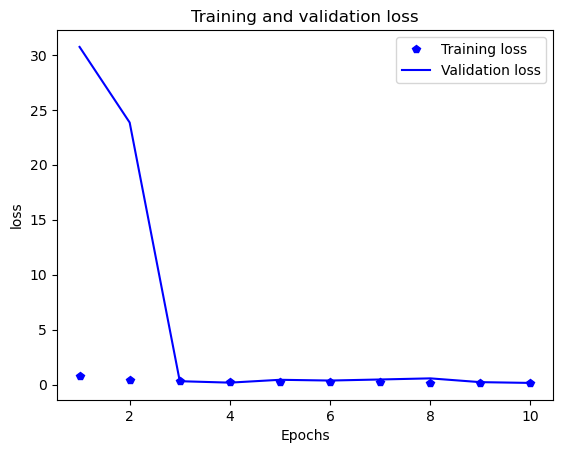

In [16]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'bp',label='Training loss')  # BP used for came output in pentagon 
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Training and validation accuracy curve

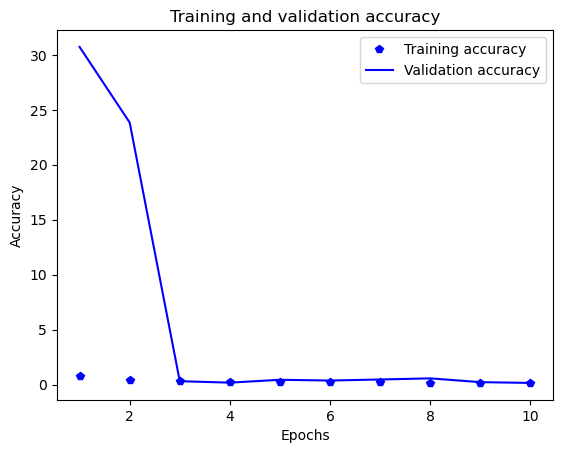

In [17]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'bp',label='Training accuracy')   
plt.plot(epochs,val_loss,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step


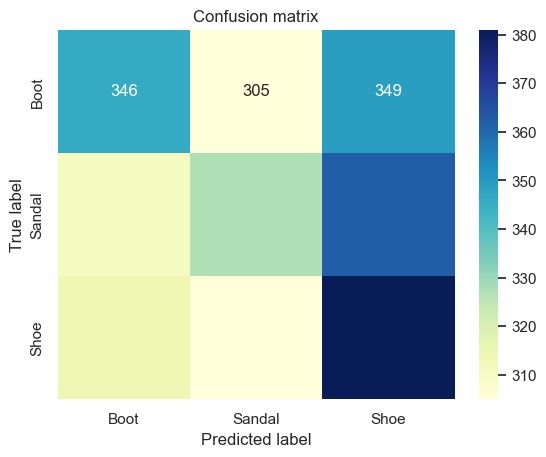

In [18]:
from sklearn.metrics import confusion_matrix
validation_labels = validation_generator.classes
validation_pred_probs =model.predict(validation_generator)
validation_pred_labels=np.argmax(validation_pred_probs,axis=1)

confusion_mtx = confusion_matrix(validation_labels,validation_pred_labels)
class_names=list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx,annot=True,fmt='d',cmap='YlGnBu',
           xticklabels=class_names,yticklabels=class_names)
plt.title('Training and validation accuracy')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

plt.show()

In [19]:
img_path=r"C:\Users\ASUS\Desktop\Deep Learning\CNN Projects\Shoe vs Sandal vs Boot Dataset\Boot\boot (2).jpg"
img=image.load_img(img_path,target_size=(48,48),color_mode="grayscale")
img_array = image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.
prediction =model.predict(img_array)
label_map={v:k for k,v in train_generator.class_indices.items()}
predicted_label=label_map[np.argmax(prediction)]
print("Emotion predicated of this image is ",predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
Emotion predicated of this image is  Boot


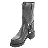

In [20]:
img

In [21]:
img_path=r"C:\Users\ASUS\Desktop\Deep Learning\CNN Projects\Shoe vs Sandal vs Boot Dataset\Boot\boot (42).jpg"
img=image.load_img(img_path,target_size=(48,48),color_mode="grayscale")
img_array = image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.
prediction =model.predict(img_array)
label_map={v:k for k,v in train_generator.class_indices.items()}
predicted_label=label_map[np.argmax(prediction)]
print("Emotion predicated of this image is ",predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Emotion predicated of this image is  Boot


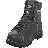

In [22]:
img

In [28]:
img_path=r"C:\Users\ASUS\Desktop\Deep Learning\CNN Projects\Shoe vs Sandal vs Boot Dataset\Boot\boot (4).jpg"
img=image.load_img(img_path,target_size=(48,48),color_mode="grayscale")
img_array = image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.
prediction =model.predict(img_array)
label_map={v:k for k,v in train_generator.class_indices.items()}
predicted_label=label_map[np.argmax(prediction)]
print("Emotion predicated of this image is ",predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Emotion predicated of this image is  Boot


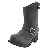

In [29]:
img

In [30]:
img_path=r"C:\Users\ASUS\Desktop\Deep Learning\CNN Projects\Shoe vs Sandal vs Boot Dataset\Sandal\Sandal (28).jpg"
img=image.load_img(img_path,target_size=(48,48),color_mode="grayscale")
img_array = image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.
prediction =model.predict(img_array)
label_map={v:k for k,v in train_generator.class_indices.items()}
predicted_label=label_map[np.argmax(prediction)]
print("Emotion predicated of this image is ",predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Emotion predicated of this image is  Sandal


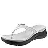

In [31]:
img

In [35]:
img_path=r"C:\Users\ASUS\Desktop\Deep Learning\CNN Projects\Shoe vs Sandal vs Boot Dataset\Sandal\Sandal (3).jpg"
img=image.load_img(img_path,target_size=(48,48),color_mode="grayscale")
img_array = image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.
prediction =model.predict(img_array)
label_map={v:k for k,v in train_generator.class_indices.items()}
predicted_label=label_map[np.argmax(prediction)]
print("Emotion predicated of this image is ",predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Emotion predicated of this image is  Sandal


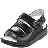

In [36]:
img

In [33]:
img_path=r"C:\Users\ASUS\Desktop\Deep Learning\CNN Projects\Shoe vs Sandal vs Boot Dataset\Shoe\Shoe (18).jpg"
img=image.load_img(img_path,target_size=(48,48),color_mode="grayscale")
img_array = image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.
prediction =model.predict(img_array)
label_map={v:k for k,v in train_generator.class_indices.items()}
predicted_label=label_map[np.argmax(prediction)]
print("Emotion predicated of this image is ",predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Emotion predicated of this image is  Shoe


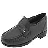

In [34]:
img